# Data Visualization in Python

## Introduction

In this module, you will learn to quickly and flexibly make a wide series of visualizations for exploratory data analysis and communicating to your audience. This module contains a practical introduction to data visualization in Python and covers important rules that any data visualizer should follow.

## Learning Objectives

* Learn critical rules about data visualization (using the correct graph types, correctly labeling all visual encodings, properly sourcing data).

* Become familiar with a core base of data visualization tools in Python - specifically matplotlib and seaborn.

* Start to develop the ability to conceptualize what visualizations are going to best reveal various types of patterns in your data.

## Choosing a Data Visualization Package

There are many excellent data visualiation modules available in Python, but for the tutorial we will stick to the tried and true combination of `matplotlib` and `seaborn`. You can read more about different options for data visualization in Python in the [More Resources](#More-Resources:) section at the bottom of this notebook. 

`matplotlib` is very expressive, meaning it has functionality that can easily account for fine-tuned graph creation and adjustment. However, this also means that `matplotlib` is somewhat more complex to code.

`seaborn` is a higher-level visualization module, which means it is much less expressive and flexible than matplotlib, but far more concise and easier to code.

It may seem like we need to choose between these two approaches, but this is not the case! Since `seaborn` is itself written in `matplotlib` (you will sometimes see `seaborn` be called a `matplotlib` 'wrapper'), we can use `seaborn` for making graphs quickly and then `matplotlib` for specific adjustments. When you see `plt` referenced in the code below, we are using `matplotlib`'s pyplot submodule.


`seaborn` also improves on `matplotlib` in important ways, such as the ability to more easily visualize regression model results, creating small multiples, enabling better color palettes, and improve default aesthetics. From [`seaborn`'s documentation](https://seaborn.pydata.org/introduction.html):

> If matplotlib 'tries to make easy things easy and hard things possible', seaborn tries to make a well-defined set of hard things easy too. 

## Setup - Load Python Packages

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mplib
import matplotlib.pyplot as plt # visualization package 1
import seaborn as sns           # visualization package 2

# database connections
import sqlalchemy
from sqlalchemy import create_engine

# so images get plotted in the notebook
%matplotlib inline

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/Wagner/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


## Matplotlib

In this section we will look at basic oprations within the matplotlib package. Matplotlib is a plotting library in Python, which produces 2D graphics. In Matplotlib, you can draw different types of graphs, like line, scatter, bar, and histogram. The basic steps to create graphs woth this package are:
1. Prepare your data
2. Create the plot
3. Plot the plot
4. Customize plot
5. Save and show plot


https://matplotlib.org/users/beginner.html provides you with more information to start using matplotlib 

We will be reading in the projects table from our database to produce an examle, in our case a histogram of the amount of federal funding given out in our study period. Then generate a histogram and customize the graph.

In [2]:
# create engine
engine = create_engine('postgresql://stuffed/cusp')

# create query 
QUERY = '''
SELECT project_number, fy, sum(fy_total_cost) AS funding
FROM wagner_ada_2018.projects 
WHERE fy >= 2010
GROUP BY project_number, fy ;
'''

# save query in datafram
prj=pd.read_sql_query(QUERY,con=engine)

# look at dataframe
prj.head()

,project_number,fy,funding
0,0001161,2010,NaN
1,0001547,2013,NaN
2,0001722,2012,NaN
3,0001726,2010,NaN
4,0001746,2013,NaN


### Example: Histogram

Before generating the graph you first want to think what you wnat to plot, and how your grpah should look like. It might help to just draw a sketch on paper first. Once you know what type of graph is best suited to illustrate the fact that you want to show, you want to think about how to prepare the data you need for the graph. For example, in our case, when we wnat to plot a histogram we want to think about including all data points or only plotting a selection of the full data set. Removing outliers has an effect on how your histogram will look like. You might want to check the skewness of the distribution of your variable of interest. 

In [3]:
## Check the distribution of our variable of interest (amount of funding)
print(prj.funding.describe())

## Let's just look at the projects with valid entries
fund = prj[prj["funding"] >= 0]

## Monetray values often have a very strong right skew:
max_fund = fund["funding"].max()
print("Maximum funding = " + str(max_fund))

## What's the minimum
min_fund = fund["funding"].min()
print("Minimum funding = " + str(min_fund))

## How many grants are higher than a million?
print((fund["funding"] < 1000000).value_counts())

## Let's just look at the projects under a million 
fund_lim = fund[fund["funding"] < 1000000]

count    5.498540e+05
mean     4.990042e+05
std      1.672349e+06
min      1.000000e+00
25%               NaN
50%               NaN
75%               NaN
max      3.006051e+08
Name: funding, dtype: float64
Maximum funding = 300605102.0
Minimum funding = 1.0
True     505552
False     44302
Name: funding, dtype: int64


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/Wagner/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/Wagner/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


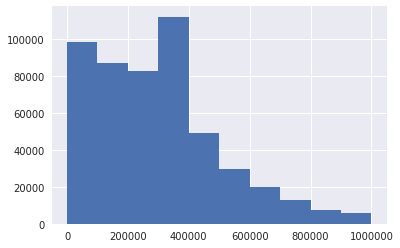

In [4]:
# Make a simple histogram:
# The plt.hist function draws histograms. You have to give it the dataframe and variable you want to plot
plt.hist(fund_lim.funding)
plt.show()

This is the default layout of a histogram in matplotlib. We can customize this graph to make it prettier. You can change the color (link to available colors: https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py), add legend and axis descriptions, change the grid, the size, change the bins, add annotations, etc.

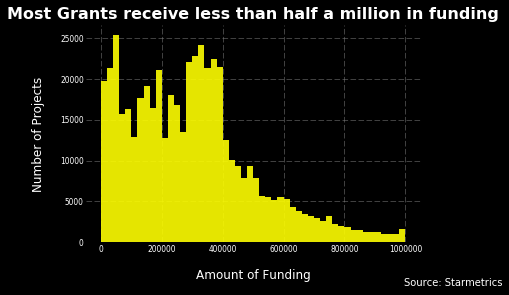

In [5]:
## Set the Background color (https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html)
plt.style.use('dark_background')

## We can change options within the hist function (e.g. number of bins, color, transparency):
plt.hist(fund_lim.funding, bins=50, facecolor="yellow", alpha=0.9)

## Add labels and title
plt.xlabel('Amount of Funding', fontsize=12, labelpad=15)
plt.ylabel('Number of Projects', fontsize=12, labelpad=15)
plt.title('Most Grants receive less than half a million in funding', fontsize=16, fontweight='bold')

## Change spacing between title and graph (default is 20)
from matplotlib import rcParams
rcParams['axes.titlepad'] = 35 

## Change axis and grid
plt.grid(color='grey', linestyle='dashed', linewidth=0.5)
plt.xticks(fontsize=7.5)
plt.tick_params(axis='x', which='major', pad=2)
plt.yticks(fontsize=7.5)
plt.tick_params(axis='y', which='major', pad=2)

## And add Data sourcing:
### xy are measured in percent of axes length, from bottom left of graph:
plt.annotate('Source: Starmetrics', xy=(0.95,-0.20), xycoords="axes fraction")

## We use plt.show() to display the graph once we are done setting options:
plt.show()

### A Note on Data Sourcing

Data sourcing is a critical aspect of any data visualization. Although here we are simply referencing the agencies that created the data, it is ideal to provide as direct of a path as possible for the viewer to find the data the graph is based on. When this is not possible (e.g. the data is sequestered), directing the viewer to documentation or methodology for the data is a good alternative. Regardless, providing clear sourcing for the underlying data is an **absolutely requirement** of any respectable visualization, and further builds trusts and enables reproducibility.

### Layering in Matplotlib
This functionality - where we can make consecutive changes to the same plot - also allows us to layer on multiple plots. By default, the first graph you create will be at the bottom, with ensuing graphs on top.

Below, we see the 2010 histogram is beneath the 2015 histogram. You might also notice that the distribution of grant funding has shifted a bit over the years. 

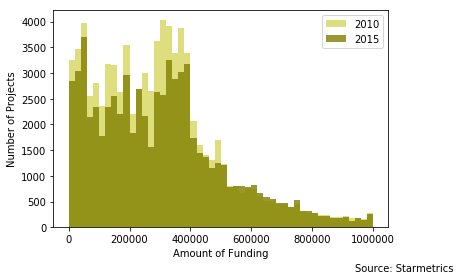

In [6]:
## Switch back to default style
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

## Layering plots
plt.hist(fund_lim[fund_lim["fy"] == 2010].funding, facecolor="y", bins=50, alpha=0.5)
plt.hist(fund_lim[fund_lim["fy"] == 2015].funding, facecolor="olive", bins=50, alpha=0.8)

plt.xlabel('Amount of Funding')
plt.ylabel('Number of Projects')
plt.annotate('Source: Starmetrics', xy=(0.9,-0.2), xycoords="axes fraction")

## create legend
plt.legend(("2010", "2015"), loc='upper right') 

plt.show()

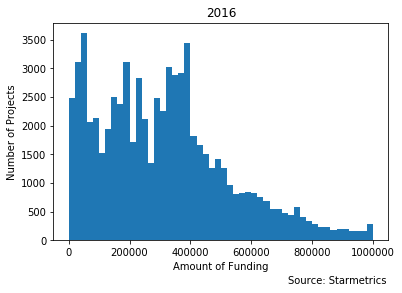

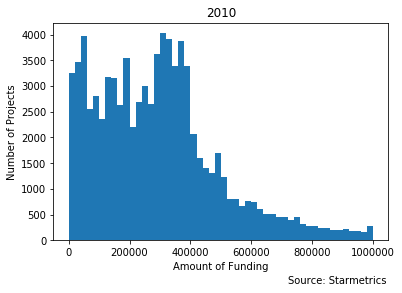

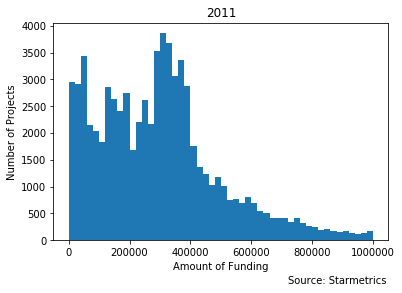

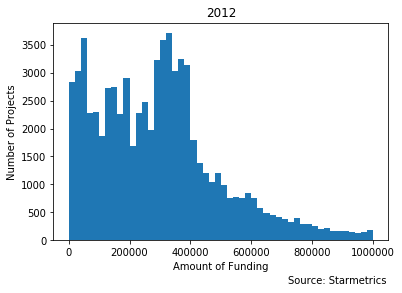

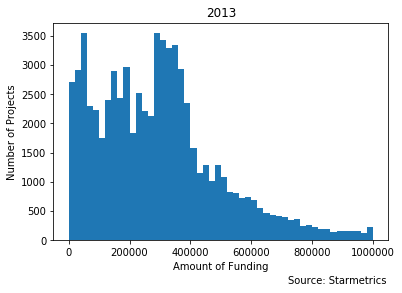

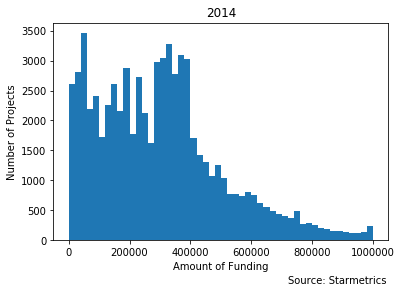

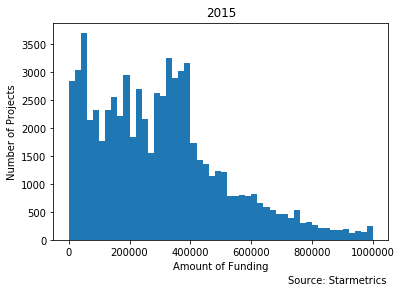

In [7]:
## Alternatively, you can create and save several charts:
for i in set(fund_lim["fy"]):
    tmp = fund_lim[fund_lim["fy"] == i]
    plt.hist(tmp["funding"],bins=50)

    plt.xlabel('Amount of Funding')
    plt.ylabel('Number of Projects')
    plt.title(str(i))
    
    plt.annotate('Source: Starmetrics', xy=(0.7,-0.2), xycoords="axes fraction")

    filename = "graph_" + str(i) + ".pdf"
    plt.show()

## Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library. In addition to matlab, this package makes it easier to
* Use default themes that are aesthetically pleasing
* Set custom color palettes
* Make attractive statistical plots
* Easily and flexibly displaying distributions
* Visualize information from matrices and DataFrames
You can see it as a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib.
More info can be found here: http://seaborn.pydata.org/api.html#api-ref

Below, we quickly use pandas to create an aggregation of our data - the average funding by year. Then we pass the data to the barplot and tsplot function in the `seaborn` function, which recall we imported as `sns` for short.

In [8]:
## Calculate average wages by year:
avg_annual_fund = prj.groupby('fy')['funding'].mean().reset_index()
avg_annual_fund.columns = ['fy','funding']

## Let's look at the result
print(avg_annual_fund)

     fy        funding
0  2010  507203.964125
1  2011  490232.804384
2  2012  489707.621422
3  2013  483173.257709
4  2014  506293.826084
5  2015  507074.370114
6  2016  508341.391810


## Barplots

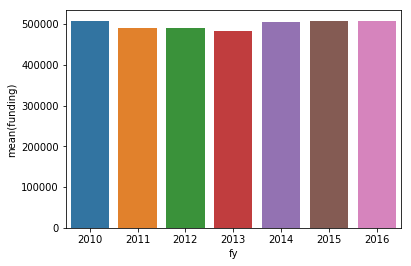

In [9]:
## Barplot function
# Note we can reference column names (in quotes) in the specified data:
sns.barplot(x='fy', y='funding', data=avg_annual_fund)

plt.show()

## Lineplots

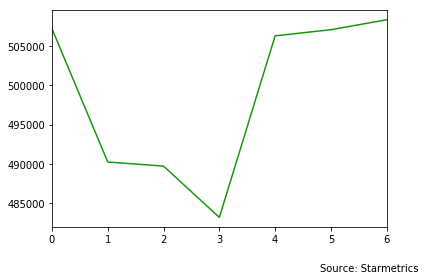

In [10]:
## We can pass a single value to a the tsplot function to get a simple line chart:
sns.tsplot(data=avg_annual_fund['funding'], color="#179809")

## Data Sourcing:
plt.annotate('Source: Starmetrics', xy=(0.8,-0.20), xycoords="axes fraction")
plt.show()

Lets add some more data to the yearly funding information we have been using for the examples so far. We can add the number of publications for each project and see how these relate to the funding amount. 

In [11]:
# create query 
QUERY = '''
SELECT COUNT(title) AS publications, project_number
FROM wagner_ada_2018.publications_other
GROUP BY project_number;
'''

# save query in datafram
abst=pd.read_sql_query(QUERY,con=engine)

# merge to prj data and keep matches
prj_abst = pd.merge(fund_lim, abst, on='project_number', how='inner')

# look at dataframe
prj_abst.head()

,project_number,fy,funding,publications
0,0804541,2010,155998.0,10
1,0805878,2010,196001.0,8
2,0805989,2010,196252.0,9
3,0806075,2010,114907.0,2
4,0832623,2011,39772.0,21


## Scatterplot 

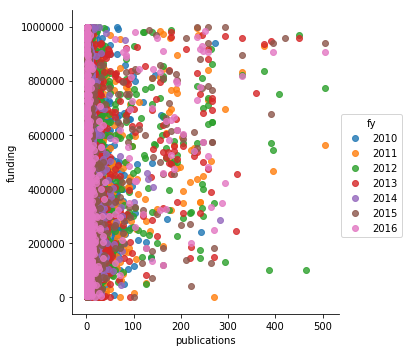

In [12]:
sns.lmplot(x='publications', y='funding', data=prj_abst,
           fit_reg=False, # No regression line
           hue='fy')      # Color by evolution stage

## Heatmap

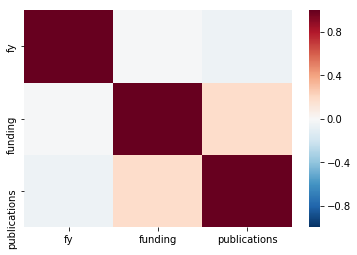

In [13]:
## Calculate correlations
corr = prj_abst.corr()
 
## Heatmap
sns.heatmap(corr)

## FacetGrid

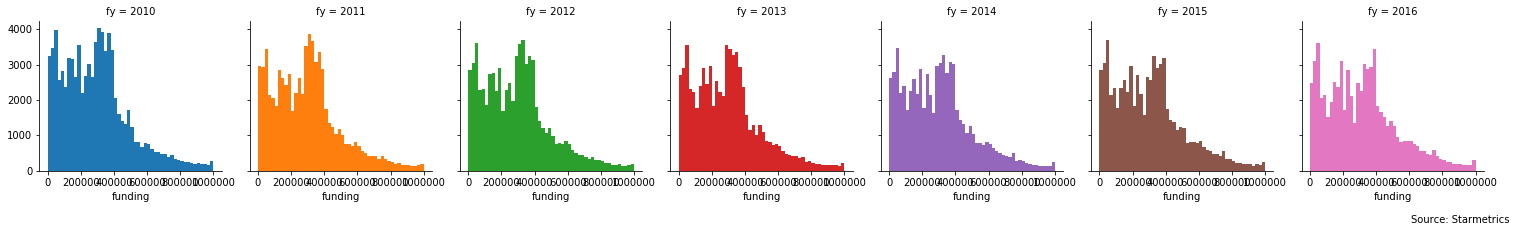

In [14]:
## Seaborn offers a powerful tool called FacetGrid for making small multiples of matplotlib graphs:

### Create an empty set of grids:
facet_histograms = sns.FacetGrid(fund_lim, col='fy', hue='fy')

## "map' a histogram to each grid:
facet_histograms = facet_histograms.map(plt.hist, 'funding', bins=50)

## Data Sourcing:
plt.annotate('Source: Starmetrics', xy=(0.6,-0.35), xycoords="axes fraction")
plt.show()

### Seaborn and matplotlib 

Below, we use seaborn for setting an overall aesthetic style and then faceting (created small multiples). We then use matplotlib to set very specific adjustments - things like adding the title, adjusting the locations of the plots, and sizing th graph space. This is a pretty protoyptical use of the power of these two libraries together. 

More on [Seaborn's set_style function](https://seaborn.pydata.org/generated/seaborn.set_style.html).
More on [matplotlib's figure (fig) API](https://matplotlib.org/api/figure_api.html).

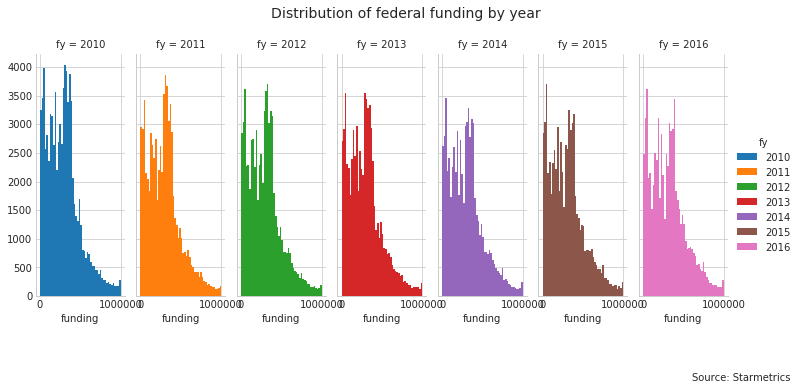

In [15]:
# Seaborn's set_style function allows us to set many aesthetic parameters.
sns.set_style("whitegrid")

facet_histograms = sns.FacetGrid(fund_lim, col='fy', hue='fy')
facet_histograms.map(plt.hist, 'funding', bins=50)

## We can still change options with matplotlib, using facet_histograms.fig
facet_histograms.fig.subplots_adjust(top=0.85)
facet_histograms.fig.suptitle("Distribution of federal funding by year", fontsize=14)
facet_histograms.fig.set_size_inches(10,5)

## Add a legend for hue (color):
facet_histograms = facet_histograms.add_legend()

## Data Sourcing:
plt.annotate('Source: Starmetrics', xy=(0.6,-0.35), xycoords="axes fraction")
plt.show()

### Using Hex Codes for Color

In the graph above, you can see I set the color of the graph with pund sign `#` followed by a series of six numbers. This is a hexcode - which is short for hexadecimal code. A hexadecimal code lets you specify one of over 16 million colors using combinations of red, green, and blue. It first has two digits for red, then two digits for green, and lastly two digits for blue: `#RRGGBB`

Further, these codes allow for you to specify sixteen integers (thus hexadecimal) for each digits, in this order:

(0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F)

Over time, it gets easier to read these codes. For instance, above, I used the hex code "#179809". Understanding how hex codes work, I can see that there is a relatively low number for red (17) and fairly high number for green (98) and another low number for blue (09). Thus it shouldn't be too surprising that a green color resulted in the graph.

Tools like [Adobe Color](https://color.adobe.com) and this [Hex Calculator](https://www.w3schoosl.com/colors/colors_hexadecimal.asp) can help you get used to this system.

Most modern browsers also support eight digit hex codes, in which the first two enable transparency, which is often called 'alpha' in data visualization: `#AARRGGBB`

### An Important Note on Graph Titles:

The title of a visualization occupies the most valuable real estate on the page. If nothing else, you can be reasonably sure a viewer will at least read the title and glance at your visualization. This is why you want to put thought into making a clear and effective title that acts as a **narrative** for your chart. Many novice visualizers default to an **explanatory** title, something like: "Average Funding over Time (2010-2015)". This title is correct - it just isn't very useful. This is particularly true since any good graph will have explained what the visualization is through the axes and legends. Instead, use the title to reinforce and explain the core point of the visualization. It should answer the question "Why is this graph important?" and focus the viewer onto the most critical take-away.

### Exporting Completed Graphs

When you are satisfied with your visualization, you may want to save a a copy outside of your notebook. You can do this with `matplotlib`'s savefig function. You simply need to run:

plt.savefig("fileName.fileExtension")

The file extension is actually surprisingly important. Image formats like png and jpeg are actually **not ideal**. These file formats store your graph as a giant grid of pixels, which is space-efficient, but can't be edited later. Saving your visualizations instead as a PDF is strongly advised. PDFs are a type of vector image, which means all the component of the graph will be maintained.

With PDFs, you can later open the image in a program like Adobe Illustrator and make changes like the size or typeface of your text, move your legends, or adjust the colors of your visual encodings. All of this would be impossible with a png or jpeg.

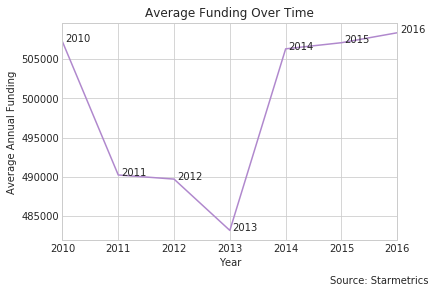

In [16]:
## Save the line chart as 'graph'
graph = sns.tsplot(data=avg_annual_fund['funding'], time=avg_annual_fund['fy'], color="#B088CD")

## To add data labels, we loop over each row and use graph.text()
for i, row, in avg_annual_fund.iterrows():
    graph.text(row["fy"] + 0.05, row["funding"] - 50, int(row["fy"]))
    
## Now change x-axis and y-axis labels:
graph.set(xlabel="Year", ylabel="Average Annual Funding")
graph.set(title="Average Funding Over Time")

plt.annotate('Source: Starmetrics', xy=(0.8,-0.20), xycoords="axes fraction")

## You can save the graph in different formats
plt.savefig('example.png')
plt.savefig('example.pdf')

## More Resources

* [A Thorough Comparison of Python's DataViz Modules](https://dsaber.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair)

* [Seaborn Documentation](http://seaborn.pydata.org)

* [Matplotlib Documentation](https://matplotlib.org)

* [Advanced Functionality in Seaborn](blog.insightdatalabs.com/advanced-functionality-in-seaborn)

## Other Python Visualization Libraries

* [Bokeh](http://bokeh.pydata.org)

* [Altair](https://altair-viz.github.io)

* [ggplot](http://ggplot.yhathq.com.com)

* [Plotly](https://plot.ly)